## Visualization of data

Here I use *R* to visualize the data. 

In [72]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML
pd.set_option('display.max_columns', None)


The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [74]:
%%R

# My commonly used R imports

require('ggplot2')
require('readr')
require('extrafont')
require('dplyr')
require('reshape2')
# require('theme538')
require('tidyverse')

In [75]:
df = pd.read_csv('https://raw.githubusercontent.com/laurabejder/federal_judges_appointment/main/data/data.csv')

In [76]:
mean = df.groupby('congress_no')['yea_votes'].mean()
median = df.groupby('congress_no')['yea_votes'].median()

mean.to_csv('mean.csv', index=True)
median.to_csv('median.csv', index=True)

Rows: 11 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): congress_no, yea_votes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


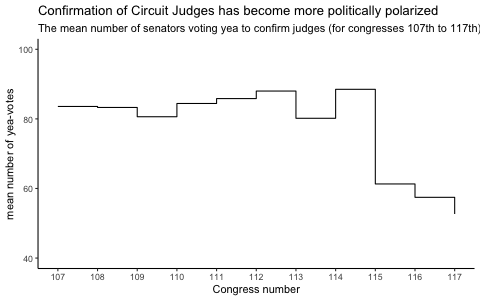

In [77]:
%%R -h 300

#Load in the mean data
df <- read_csv('mean.csv')

ggplot(data=df, aes(x=congress_no, y=yea_votes)) +
  geom_step()+
  coord_cartesian(xlim = c(107, 117), 
                  ylim = c(40, 100)) +
  scale_x_continuous(breaks=seq(107, 117))+
  theme_classic() +
  labs(
    x = 'Congress number',
    y = 'mean number of yea-votes',
    title = 'Confirmation of Circuit Judges has become more politically polarized',
    subtitle = 'The mean number of senators voting yea to confirm judges (for congresses 107th to 117th)'
  )

Rows: 11 Columns: 2
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (2): congress_no, yea_votes

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


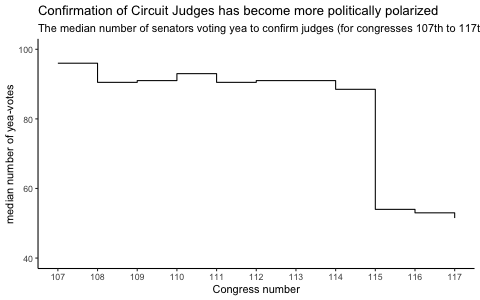

In [78]:
%%R -h 300

#Load in the mean data
df <- read_csv('median.csv')

ggplot(data=df, aes(x=congress_no, y=yea_votes)) +
  geom_step()+
  coord_cartesian(xlim = c(107, 117), 
                  ylim = c(40, 100)) +
  scale_x_continuous(breaks=seq(107, 117))+
  theme_classic() +
  labs(
    x = 'Congress number',
    y = 'median number of yea-votes',
    title = 'Confirmation of Circuit Judges has become more politically polarized',
    subtitle = 'The median number of senators voting yea to confirm judges (for congresses 107th to 117th)'
  )

In [79]:
df_long = pd.read_csv('https://raw.githubusercontent.com/laurabejder/federal_judges_appointment/main/data/data.csv')\
    .query("record_vote_number.notna()")[
    ['name', 'D_yea', 'R_yea', 'I_yea']].melt(id_vars='name')

df_long.to_csv('long_df.csv', index=False)

df_long

,name,variable,value
0,Roopali H. Desai,D_yea,46
1,Florence Y. Pan,D_yea,46
2,Sarah A. L. Merriam,D_yea,48
3,Lara E. Montecalvo,D_yea,47
4,Salvador Mendoza Jr,D_yea,41
...,...,...,...
520,Barrington D. Parker,I_yea,1
521,Terrence L. O'Brien,I_yea,1
522,Michael J. Melloy,I_yea,1
523,William J. Riley,I_yea,1


In [80]:
df_long = pd.read_csv('https://raw.githubusercontent.com/laurabejder/federal_judges_appointment/main/data/data.csv')\
    .query("record_vote_number.notna()")[
    ['name', 'congress_no', 'session', 'circuit', 'democrats','republicans','independents', 'D_yea', 'R_yea', 'I_yea','confirmation_date']]\
    .sort_values(by='confirmation_date', ascending=False)\
    .melt(id_vars=['name', 'congress_no', 'session', 'circuit', 'democrats','republicans','independents','confirmation_date'])

df_long.to_csv('long_df.csv', index=False)

Rows: 525 Columns: 10
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (3): name, circuit, variable
dbl  (6): congress_no, session, democrats, republicans, independents, value
date (1): confirmation_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


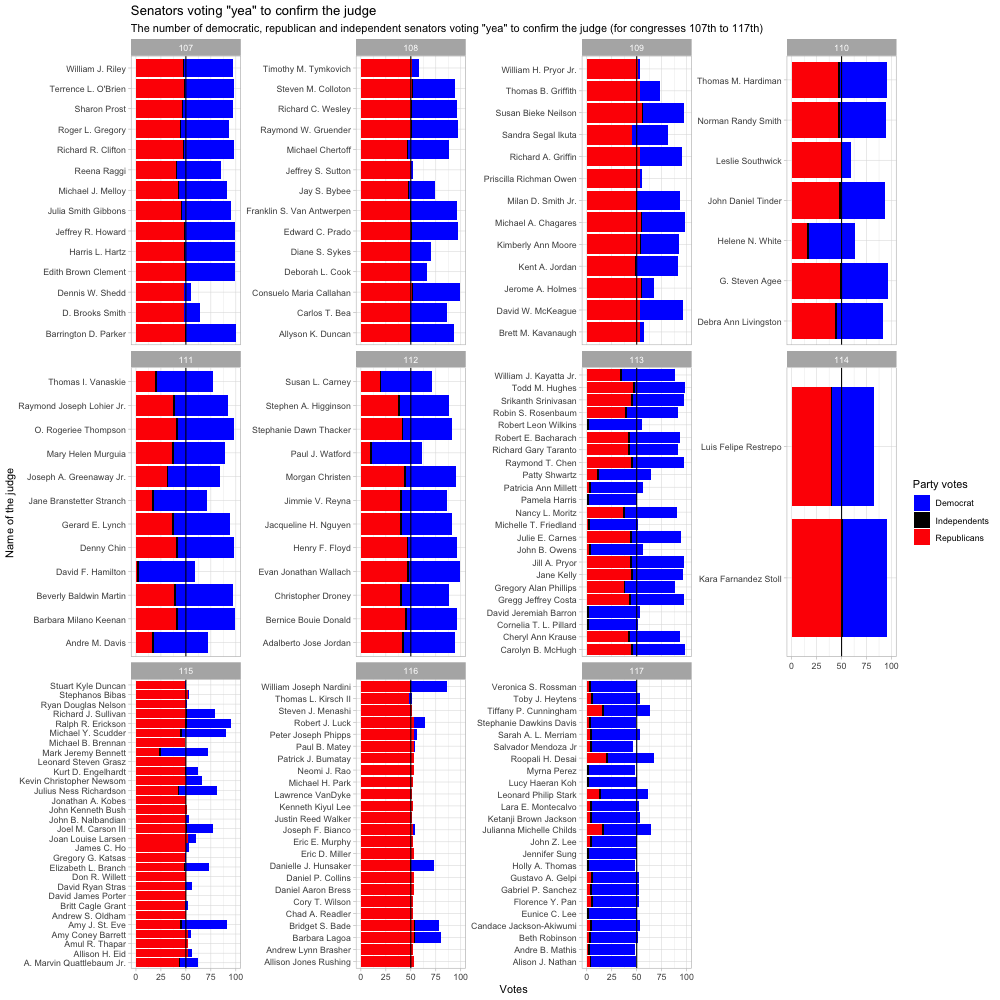

In [94]:
%%R -h 1000 -w 1000
require('tidyverse')

# EXAMPLE R CELL
df <- read_csv('long_df.csv') %>%
    select(c(name, value, variable, congress_no))
 
ggplot(df, aes(y=name, x=value, fill=variable)) + 
    geom_col() + 
    geom_vline(aes(xintercept=50)) +
    facet_wrap(~congress_no, scales='free_y')+
    scale_fill_manual(values=c("blue", "black", "red"), 
                       name="Party votes",
                       breaks=c("D_yea", "I_yea", "R_yea"),
                       labels=c("Democrat", "Independents", "Republicans")) +
    theme_light()+
    labs(
    x = 'Votes',
    y = 'Name of the judge',
    title = 'Senators voting "yea" to confirm the judge',
    subtitle = 'The number of democratic, republican and independent senators voting "yea" to confirm the judge (for congresses 107th to 117th)'
    )